05 決定木
========

* `決定木`は、クラス分類と回帰タスクに広く用いられているモデルである

    * `決定木`では、Yes/Noで答えられる質問で構成された階層的な木構造を学習する
    
    * 質問は、以下の一連の質問を`決定木`として表現することができる

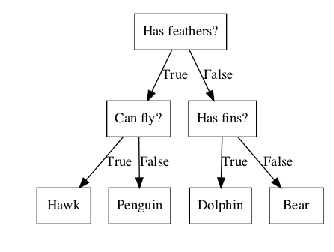

In [6]:
import mglearn

mglearn.plots.plot_animal_tree()

* 上の図からわかるように、木のノードは質問を表しているか、答えを表す終端ノード(葉)か、である

    * 質問をするエッジの先が、次にする質問ということになる
    
* 機械学習の言葉で言えば、4クラスの動物(鷹、ペンギン、イルカ、熊)を3つの特徴量(羽毛はあるか？、飛べるか？、ヒレはあるか？)で識別したモデルを作っている

    * このようなモデルを手で作るのではなく、データから教師あり学習によって作ることができる

## 1. 決定木の構築

* 以下の図に示す2次元クラス分類データセットを用いて、決定木の構築過程を見てみる

    * このデータセットはそれぞれ50データポイントからなる2つの半月形を組み合わせたような形になっている
    
    * このデータセットを、`two_moons`と呼ぶ

* 決定木における学習は、正解に最も早くたどり着けるような一連のYes/No型の質問の学習を意味する

    * 機械学習では、これらの質問は**テスト**と呼ばれる(モデルの汎化性能を測るためのセットとは異なる)
    
    * 通常のデータの特徴量は、以下に示す2次元データセットのように連続値になっている
    
    * 連続値に対するテストは、「特徴量$i$は値$a$よりも大きいか？」という形をとる

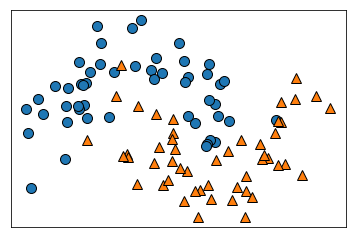

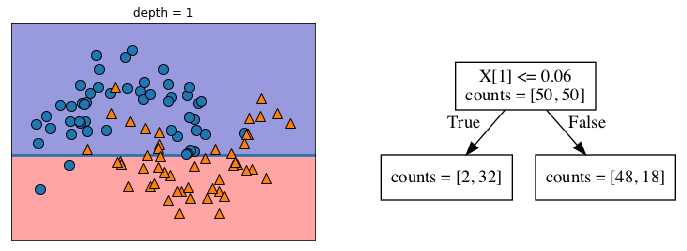

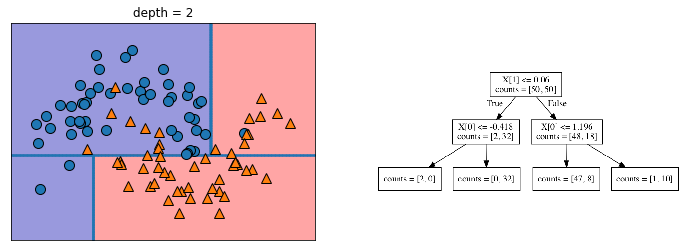

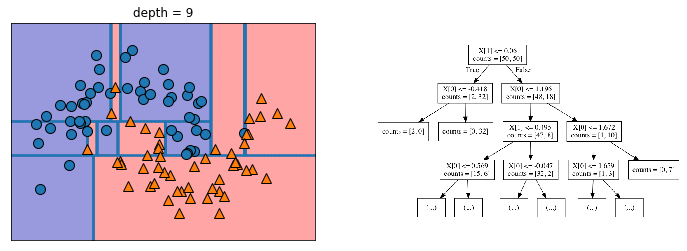

In [7]:
mglearn.plots.plot_tree_progressive()

* 決定木を構築する際、アルゴリズムは全ての可能なテストの中から、目的変数に対して最も情報の量の多いものを選ぶ

* `depth=1`で選択された最初のテストを考える

    * `x[1]=0.0596`で水平にデータセットを分割することが最も情報の量が多く、クラス0とクラス1を最もよく分割する
    
    * 頂点ノード(ルート)はデータセット全体、つまりクラス0に属する50点のクラス1に属する50点を示す
    
    * `[x] <= -0.596`による分割は黒い線で示されている
    
    * あるデータポイントがこのテストに対して真の場合、左側のノードに割り当てられる
    
        * 左側のノードにはクラス０が48点、クラス1が18点ある
        
        * これらのノードは上の領域と下の領域に対応する
        
     * 最初の分割はかなりうまく2つのクラスを分類しているが、下の領域にもクラス0に属する点があり、上の領域にもクラス1に属する点がある
     
         * これらのプロセスをそれぞれの領域に対して繰り返していくことにより、より正確なモデルを作ることができる

* `depth=2`に、`x[0]`の値に対する最も情報の量が多い分割を示す

    * このプロセスを再帰的に繰り返すと、2分木による決定木が得られる
    
    * 個々のノードはテストに対応する
    
    * 個々のテストは対象としている範囲のデータを、いずれかの軸に沿って分割していると考えることもできる
    
    * この見方では、アルゴリズムが階層的な分割を行なっていることになる
    
    * 個々のテストは1つの特徴量しか考えないので、分割された領域は常に軸に平行な境界を持つ

* データの再帰分割は、対象の領域(決定木の葉)に1つの対象値(1クラス、1つの回帰値)しか含まれなくなるまで繰り返される

    * 1つの対象値のデータポイントしか含まれないような決定木の葉を**純粋**と呼ぶ
    
* この分割の最終的な分割を、`depth=9`で示している

    * 新しいデータポイントに対する予測は、そのデータポイントが属する特徴量空間上の分割領域によって行われる
    
    * その領域に含まれるデータポイントの多数が持つターゲット値が用いられる(純粋な葉の場合にはその領域に対応するターゲット値は1つしかない)
    
    * データポイントが属する領域を探すには、決定木を上から下に向かって、テストの真偽で左右を決めながら辿れば良い

* 決定木は全く同じようにして回帰タスクに利用することもできる
    
    * 予測を行うには、テストに基づいてノードを辿り、そのデータポイントが属する葉を求める
    
    * データポイントに対する出力は、その葉の中にある訓練データポイントの平均ターゲット値になる

## 2. 決定木の複雑さの制御

* 一般に、上で述べたような方法で、葉が純粋になるまで分割を続けていると、モデルは複雑になりすぎ、訓練データに対して大幅に過剰適合してしまう

    * 葉が純粋になっているということは、訓練セットに対して100%の精度になっていることである
    
    * 訓練セットのデータポイントは、属する葉の中で常に正しい多数派クラスになっているからである
    
        * `depth=9`では、クラス0の領域の中にクラス1に属する領域がある
        
        * 一方で右の方にはクラス1に囲まれた中にクラス0の細い線のような領域がある
        
        * この決定境界は、そのクラスに属する他の点からかけ離れた場所に1つだけある外れ値を重視しすぎている

* 過剰適合を防ぐには、2つの戦略がある

    1. `事前枝刈り`：構築過程で木の生成を早めに止める(木の深さを制限する方法、葉の最大値を制限する方法、分割する際にその中に含まれている点の最小数を決めておく方法)
    
    1. `事後枝刈り`：一度木を構築してから、情報の少ないノードを削除する
    

* scikit-learnでは、決定木は`DecisionTreeRegressor`クラスと`DecisionTreeClassifier`クラスに実装されている

    * scikit-learnには事前枝刈りしか実装されていない
    
    * 事前枝刈りの効果を、cancerデータセットを用いてより詳しく見る
    
        1. データセットを読み込んで、訓練セットとデータセットに分割する
        
        1. デフォルトの設定で完全な木を構築する（葉が純粋になるまで木を育てる)
        
           * ここでは、内部でタイブレークに使われる`random_state`を固定する

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                                                        cancer.target,
                                                                                        stratify=cancer.target,
                                                                                        random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


* 訓練セットの精度は100%となっている

    * これは、訓練データの全てのラベルを覚えるのに十分なほど木が育っているからである
    
    * テストセットに対する精度は、以前見た線形モデルより少し悪く95%程度になっている

* 決定木の深さに制約を与えないと、決定木はいくらでも深く、複雑になる

    * したがって、枝刈りされていない木は過剰適合になりやすく、新しいデータに対する汎化性能が低い傾向にある
    
* ここで、事前枝刈りを適用して、木が完全に訓練データに適合する前に木の成長を止める
    
    * 木がある深さに達したらそこで止めるという方法
    
    * ここでは、`max_depth=4`としている
    
    * 木の深さを制限することで、訓練セットに対する精度は下がるが、テストセットに対する精度は向上する
    

In [9]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


## 3. 決定木の解析

* `tree`モジュールの`export_graphviz`関数を使って木を可視化することができる

    * この関数は、グラフを格納するテキストファイル形式である
    
    * `.dot`ファイル形式でファイルを書き出す
    
    * ノードにそのノードでの多数派のクラスに応じた色を付けるようにオプションで指定し、木に適切なラベルが付くようにクラスの名前と特徴量の名前を渡している

In [10]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", 
                              class_names=["malignant", "benign"], 
                              feature_names=cancer.feature_names,
                              impurity=False,
                              filled=True)

* このファイルを読み込んで、`graphviz`モジュールを用いて可視化することができる


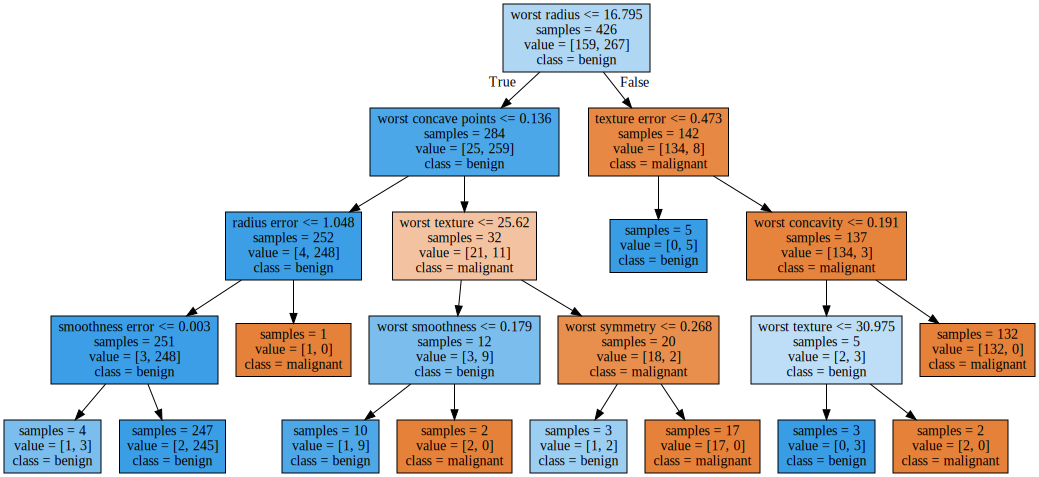

In [11]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* 決定木を可視化したものを見ると、このアルゴリズムの予測過程をより深く知ることができる

* 決定木を検証する良い方法の一つは、大多数のデータが辿るパスを見つけることである

    * `samples`は、そのノードにあるサンプルの個数を示し、`value`はクラスごとのサンプルの個数を示している
    
    * ルートから右の枝を辿ると、`worst radius > 16.795`によって作られるノードには、8の良性と134の悪性しかない
    
         * こちら側の決定木の残りはより細かい識別を行なって、良性の8つのサンプルを分離するために費やされている
         
         * 最初の分岐で右に行った142のサンプルのうち、そのほとんど(132)が一番右の葉に行き着く
     
     * ルートから左に行った場合、`worst radius <= 16.795`の場合になるのは、悪性25点、良性259点である
     
         * ほとんどん全ての良性のサンプル点は左から2番目の葉に行き着き、その他の葉にはごくわずかのサンプル点しかない

## 4. 決定木の特徴量の重要性

* 決定木全体を見るのは大変なので、決定木から導出できる、決定木の挙動を要約する特性値を見てみる

* 要約に最も用いられるのは`特徴量の重要度`と呼ばれる

    * 個々の特徴量がどの程度重要かを示す割合
    
    * それぞれの特徴量に対する0と1の間の数で、0は「全く使われていない」、1は「完全にターゲットを予測できる」を意味する
    
    * 特徴量の重要度の和は常に1になる

In [13]:
print("Feature importances: \n{}".format(tree.feature_importances_))

Feature importances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


* 線形モデルで係数を見たときと同じような方法で、特徴量の重要度を可視化することができる

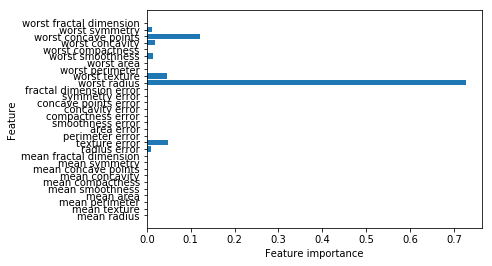

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

* 最初の分岐に用いた特徴量が群を抜いて重要な特徴量であることがわかる

    * これは、決定木を解析した際の、最初のレベルで2つのクラスがかなり綺麗に分離できている、という観察結果と一致する
    
* しかし、ある特徴量の重要度(`feature_importance_`)の値が低いからと言って、その特徴量の持つ情報が少ないとは限らない

    * 単にその決定木で採用されなかった、ということだけ
    
* 線形モデルの係数と異なり、特徴量の重要度は常に正であり、特徴量がどのクラスを示しているかをエンコードしている訳ではない

    * 特徴量の重要度は、サンプルが良性か悪性かを判断する上で、「`worst radius`」が重要であることを教えてくれる
    
    * しかし、この値が大きいと良性になるのか悪性になるのかを教えてくれる訳ではない
    
    * 次の例で示すように、特徴量とクラスの関係はそれほど単純ではない

Feature importances: [0. 1.]


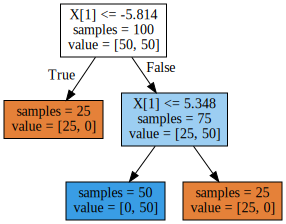

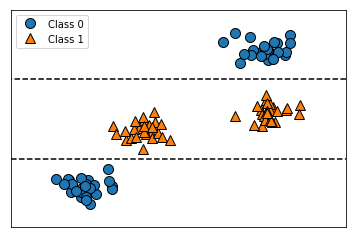

In [17]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

* 2つの特徴量を持つ2つのクラスからなるデータセットを示している

    * ここでは全ての情報は`X[1]`にあり、`X[0]`は使われていない
    
    * しかし、`X[1]`と出力クラスの関係は単調ではない
    
     * つまり、「`X[1]`の値が大きいとクラス0になり、小さいとクラス1になる」(もしくはその逆)のようなことは言えない

* ここで述べてきたことは、`DecisionTreeRegressor`に実装されている決定木による回帰を用いる場合にも同様に当てはまる

    * 回帰決定木の使い方も解析も、クラス分類決定木のそれとほとんど同じである
    
    * ただし、1つだけ決定木(そして全ての決定木による回帰モデル)は、**外挿**できない
    
        * つまり、訓練データのレンジの外側に対しては予測ができない

* 計算機のメモリ(RAM)価格の履歴データセットを使って詳しくみる

    * 以下にこのデータセットを示す
    
    * $x$軸は年を、$y$軸はメガバイトあたりのRAM価格を示している

Text(0, 0.5, 'Price in $/Mbyte')

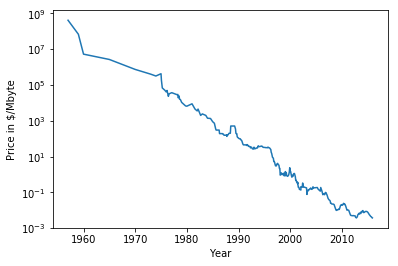

In [19]:
import pandas as pd
import os

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

* $y$軸が対数スケールになっていることに注意する

* 対数でプロットすると、この関係は多少の凸凹があるがおおよそ直線になり、予測がしやすくなる

* 2000年までのデータを使って、それ以降を予測してみる

    * 2つの簡単なモデル(`DecisionTreeRegressor`と`LinearRegression`)を比較する
    
    * 価格は対数スケールに直して、関係が比較的線形になるようにしている
    
    * これは、`DecisionTreeRegressor`にはあまり関係ないが、`LinearRegression`では非常に重要になる
    
    * これらのモデルを訓練して予測してみる
    
    * 結果の値を見るには対数変換をキャンセルするために、指数変換する必要がある

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 過去のデータを用いて2000年以降の価格を予想する
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 日付に基づいて価格を予測
X_train = data_train.date[:, np.newaxis]
# データとターゲットの関係を単純にするために対数変換
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 全ての価格を予想
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 対数変換をキャンセルするために逆変換
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

* 下の図は、決定木モデルと線形回帰モデルの予測結果と、実際のデータを比較している

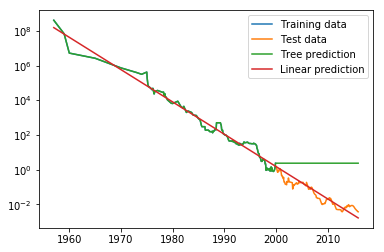

In [26]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

* 2つのモデルの違いには驚くべきものがある

* 線形モデルは、我々が知る通りデータを直線で近似する
    
    * この直線は、訓練データとテストデータの双方に置いて細かい変異を取りこぼしているものの、テストデータ(2000年以降のデータ)に対してかなり良い予測を与えている
    
* 一方、決定木の方は、訓練データに対しては完全な予測を行う

    * 複雑さを制約していないので、データセットを完全に覚えているため
    
    * しかし、モデルがデータを持っていない領域になると、決定木は知っている最後の点を返してくれるだけになる
    
    * 決定木は、訓練データにない領域に関しては、「新しい」答えを生成することはできない(この欠点は、決定木に関する全てのモデルに共通する)

## 5. 長所、短所、パラメータ

* 決定木におけるモデルの複雑さを制御するパラメータは、決定木が完全に成長する前に構築を停止する事前枝刈りパラメータである

    * 多くの場合、過剰適合を防ぐためには事前枝刈り戦略を指定する`max_depth`、`max_leaf_nodes`、`min_samples_leaf`のどれか1つを選ぶだけで十分
    
* 決定木にはこれまで見てきたアルゴリズムと比較して、2つの長所がある
    
    1. 結果のモデルが容易に可視化可能
    
    1. データのスケールに対して完全に不変である
    
* 個々の特徴量は独立に処理され、データの分割はスケールに依存しないので、、決定木に置いては特徴量の正規化や標準化は必要ない

    * 決定木は、特徴量ごとにスケールが大きく異なるような場合でも、2値特徴量と連続値特徴量が混ざっているような場合でも、問題なく機能する

* 決定木の最大の問題点は、事前枝刈りを行っても、過剰適合しやすく、汎化性能が低い傾向があることだ


|  版  |    年/月/日    |
|-----|------------------|
|初版|2019/03/03|